<a href="https://colab.research.google.com/github/AlexanderEM-git/TDS3/blob/main/Mini_Proyecto1/An%C3%A1lisis_Mutivariado_para_la_computaci%C3%B3n_afectiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

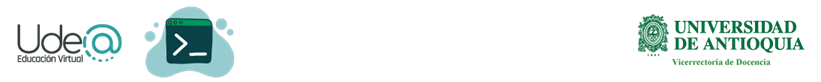

# Mini-proyecto 1. Adquisicion de datos y aplicacion de tecnicas de preprocesamiento para resolver un problema particular

**Estudiantes:**


*   Alexander Espinosa Montoya.
*   Jose Daniel Rivera


**Tratamiento de Señales III**

**Facultad de Ingeniería**

**Universidad de Antioquia**

---

#1. Descripcion

La emoción es un proceso psicofisiológico desencadenado por la percepción consciente y/o inconsciente de un objeto o situación y, a menudo, se asocia con el estado de ánimo, el temperamento, la personalidad, la disposición y la motivación. Las emociones juegan un papel importante en la comunicación humana y pueden expresarse verbalmente a través del vocabulario emocional o mediante la expresión de señales no verbales como la entonación de la voz, las expresiones faciales y los gestos. La mayoría de los sistemas contemporáneos de interacción humano-computadora (HCI) son deficientes en la interpretación de esta información y adolecen de una falta de inteligencia emocional. En otras palabras, no pueden identificar los estados emocionales humanos y utilizar esta información para decidir las acciones adecuadas que ejecutar. El objetivo de la computación afectiva es llenar este vacío detectando señales emocionales que ocurren durante la interacción humano-computadora y sintetizando respuestas emocionales.

La evaluación de las emociones a menudo se lleva a cabo mediante el análisis de las expresiones emocionales y/o señales fisiológicas de los usuarios. Las expresiones emocionales se refieren a cualquier comportamiento verbal y no verbal observable que comunica emoción. Hasta ahora, la mayoría de los estudios sobre evaluación de emociones se han centrado en el análisis de las expresiones faciales y el habla para determinar el estado emocional de una persona. También se sabe que las señales fisiológicas incluyen información emocional que se puede utilizar para evaluar las emociones, pero han recibido menos atención. Ellas comprenden las señales que se originan en el sistema nervioso central (SNC) y el sistema nervioso periférico (SNP).






#2. Actividad de aprendizaje

Aquí está el texto corregido con los errores en las tildes resueltos:

1. Se requiere construir un framework que permita procesar y caracterizar las señales fisiológicas para agruparlas en estados emocionales. Para ello se trabajará con la base de datos DEAP dataset, la cual es un conjunto de datos para el análisis de emociones usando señales de EEG, fisiológicas y de video.

2. El objetivo de este mini-proyecto es realizar la caracterización de los estados emocionales de la siguiente manera:
   * En los equipos de trabajo, se deben escoger mínimo 3 características por cada tipo de señal en la base de datos. La siguiente tabla muestra las características más relevantes para extraer de un proceso emocional de las cuales debe escoger dicha cantidad por cada grupo.

   Se debe crear un módulo en Python que realice la extracción de características de tal forma que para cada uno de los 40 videos que inducen estados emocionales, se construya una matriz de la forma X ∈ R^N×D, donde N es el número de observaciones (en este caso las realizaciones emocionales), y D es el número de características resultantes en el proceso de extracción.

   * Con las características extraídas, se desea implementar un modelo de visualización de pares característicos utilizando la librería seaborn: statistical data visualization. El objetivo es encontrar pares de información que puedan derivar en la identificación de los estados emocionales.

3. La actividad se deberá desarrollar en los equipos de trabajo y se debe construir un repositorio en GitHub, en el cual carguen los archivos y demás elementos en el proyecto. Se requiere que existan al menos 3 commits para realizar el seguimiento de las versiones del proyecto. En la siguiente página pueden encontrar los pasos básicos para la gestión del repositorio Git: Git Guide.

#3. Desarroyo

In [ ]:
# librerias
import scipy.io as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
# Cargar el archivo .mat
"""from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
"""

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
datosP1 = sc.loadmat('/content/drive/MyDrive/Miniproyecto 1 Señales 3/Copia de s17.mat')
datosP2 = sc.loadmat('/content/drive/MyDrive/Miniproyecto 1 Señales 3/Copia de s16.mat')
datosP3 = sc.loadmat('/content/drive/MyDrive/Miniproyecto 1 Señales 3/Copia de s15.mat')

#s##.mat son los datos, de una matriz de 40 videos * 40 canal * datos

## Señales Fisiológicas periféricas

33. hEOG (horizontal EOG): Señal de seguimiento de movimientos oculares horizontales. Calculada como hEOG1 - hEOG2.

34. vEOG (vertical EOG): Señal de seguimiento de movimientos oculares verticales. Calculada como vEOG1 - vEOG2.

35. zEMG (Zygomaticus Major EMG): Señal electromiográfica del músculo Zygomaticus Major. Calculada como zEMG1 - zEMG2.

36. tEMG (Trapezius EMG): Señal electromiográfica del músculo Trapezius. Calculada como tEMG1 - tEMG2.

37. GSR (Galvanic Skin Response): Medida de la respuesta eléctrica de la piel. Los valores están en formato Ohm.

38. Respiration belt: Señal relacionada con la respiración. Es probable que represente la expansión y contracción del pecho o el abdomen durante la respiración.

39. Plethysmograph: Señal que generalmente mide cambios en el volumen de sangre en un área particular, como la punta de un dedo.

40. Temperature: Medida de temperatura, posiblemente de la piel o de algún otro punto del cuerpo.

- Los datos se redujeron a una frecuencia de muestreo de 128Hz.
- Los datos se dividieron en segmentos de 60 segundos y se eliminó una línea de base de 3 segundos antes de cada segmento.
- Los ensayos se reordenaron desde el orden de presentación original al orden basado en videos (Experiment_id).

Recordemos que la base de datos DEAP está organizada como:

|Array name	|Array shape	|Array contents|
|-----------|-------------|--------------|
|data	|40 x 40 x 8064	|video/trial x channel x data|
|labels	|40 x 4	|video/trial x label (valence, arousal, dominance, liking)|

## Espacios Arousal - Valence


- **Excitación (arousal)**: El nivel de activación fisiológica o excitación experimentado en respuesta a un estímulo, que va desde bajo (tranquilo) hasta alto (intenso).

- **Valencia (valence)**: La cualidad emocional o positividad/negatividad de la experiencia subjetiva de un individuo, que va desde negativa (desagradable) hasta positiva (agradable).

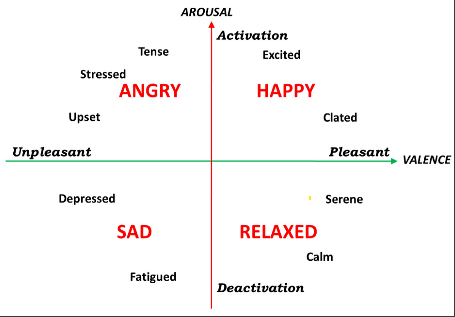

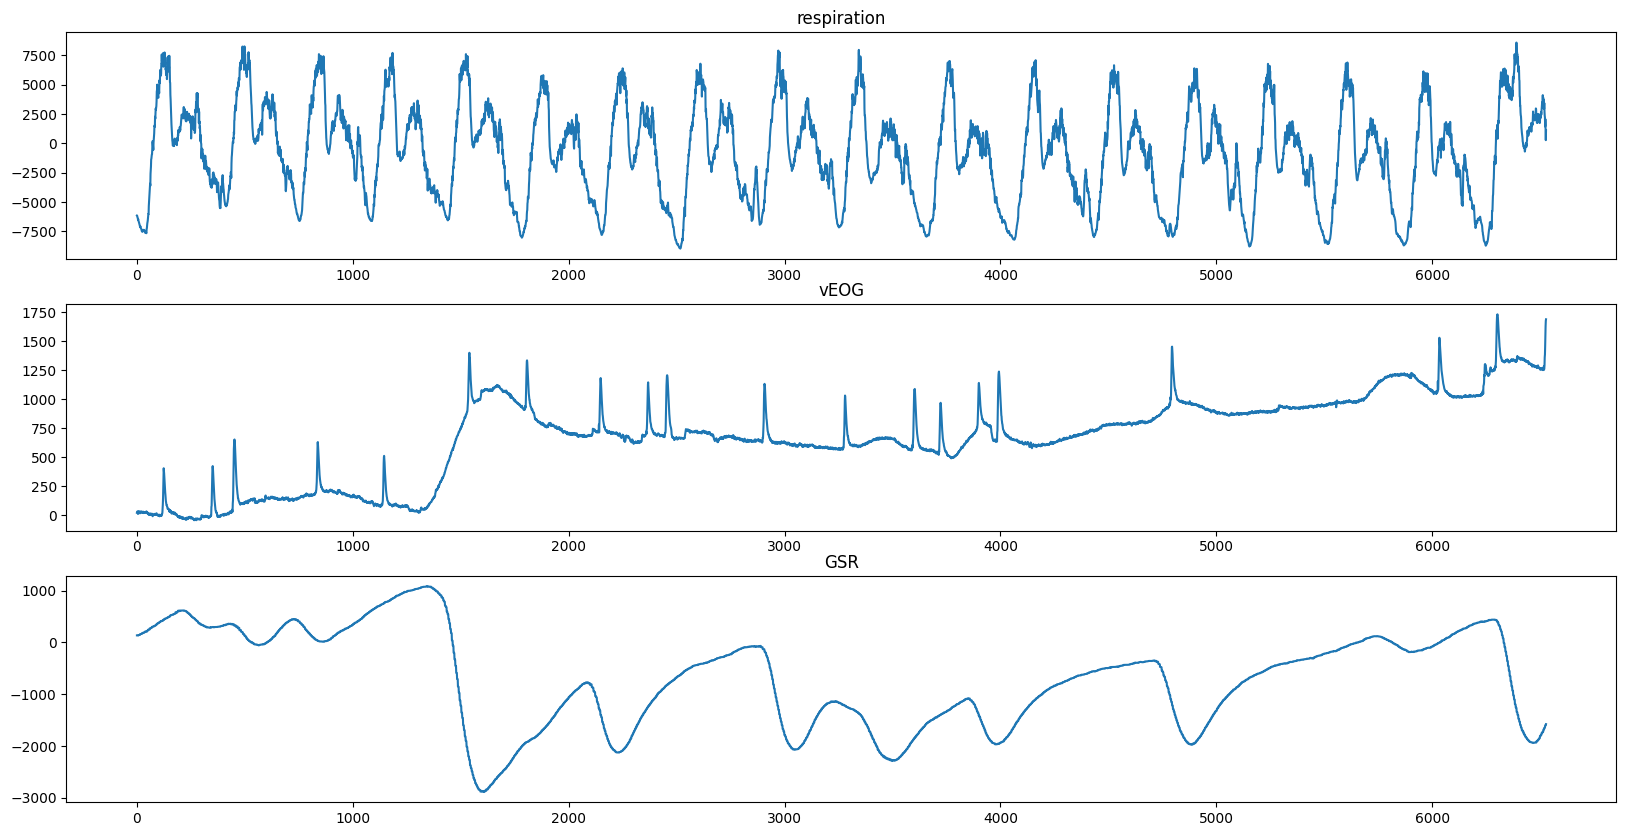

Respiration_Data:  [-6154.74196418 -6171.05443404 -6253.52303166 ...  1288.83803196
   273.37115829  1110.46336156]
GSR:  [  137.58393385   137.58393385   137.48830827 ... -1601.26125379
 -1599.91559318 -1577.38817254]
vEOG:  [  19.72148049   25.15897044   28.47146432 ... 1626.53101151 1673.4059249
 1686.84340007]
Emocion:  [1. 2. 1. 1. 2. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 0. 0. 0. 1.
 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 2. 1.]


In [ ]:
fs = 128 #128hz
signals = datosP1['data']
etiquetas = datosP1['labels']
# Esto me arrojará un nd array de n_video * id_signal * Ntimepoints
arousal = etiquetas[:,1]
valence = etiquetas[:,0]
emocion = np.zeros(np.size(arousal))
emocion[valence<=4] = "0"
emocion[np.logical_and(valence>4, valence <=7)] = 1
emocion[valence>7] = "2"

# Señal = [video, # Señal, : todo la data]
GSR = signals[0,36,:]
respiration = signals[0,37,:]
vEOG = signals[0,33,:]

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 10))
ax1.plot(respiration)
ax1.set_title('respiration')
ax2.plot(vEOG)
ax2.set_title('vEOG')
ax3.plot(GSR)
ax3.set_title('GSR')
plt.show()
print("Respiration_Data: ", respiration)
print("GSR: ", GSR)
print("vEOG: ", vEOG)
print("Emocion: ", emocion)

In [ ]:
def caracterizadorDEAP(Bio_señales,video):
  # Biosignals 40*Señal(1)*8035 donde 40 son todas las diferentes bioseñales

  #33. hEOG (horizontal EOG): Señal de seguimiento de movimientos oculares horizontales. Calculada como hEOG1 - hEOG2.
  hEOG = Bio_señales[video,32,:]
  #34. vEOG (vertical EOG): Señal de seguimiento de movimientos oculares verticales. Calculada como vEOG1 - vEOG2.
  vEOG = Bio_señales[video,33,:]
  #35. zEMG (Zygomaticus Major EMG): Señal electromiográfica del músculo Zygomaticus Major. Calculada como zEMG1 - zEMG2.
  zEMG = Bio_señales[video,34,:]
  #36. tEMG (Trapezius EMG): Señal electromiográfica del músculo Trapezius. Calculada como tEMG1 - tEMG2.
  tEMG = Bio_señales[video,35,:]
  #37. GSR (Galvanic Skin Response): Medida de la respuesta eléctrica de la piel. Los valores están en formato Ohm.
  GSR = Bio_señales[video,36,:]
  #38. Respiration belt: Señal relacionada con la respiración. Es probable que represente la expansión y contracción del pecho o el abdomen durante la respiración.
  Respiration = Bio_señales[video,37,:]
  #39. Plethysmograph: Señal que generalmente mide cambios en el volumen de sangre en un área particular, como la punta de un dedo.
  Blood_VP = Bio_señales[video,38,:]
  #40. Temperature: Medida de temperatura, posiblemente de la piel o de algún otro punto del cuerpo.
  Skin_temp = Bio_señales[video,39,:]

  #Super vector de todas las caracteristicas de las señales de un video en especifico
  xTrial = np.hstack((hEOG,vEOG,zEMG,tEMG,GSR,Respiration,Blood_VP,Skin_temp))

  return xTrial

In [ ]:
from scipy.signal import find_peaks
from scipy.signal import welch

def GSR_C(GSR):
  # Resistencia media de la piel (average skin resistance)
  resistencia_media = np.mean(GSR)
  # Encontrar los valles como mínimos locales en la señal GSR
  valleys, _ = find_peaks(-GSR)
  # Calcular el número de mínimos locales
  number_of_local_minima = len(valleys)
  # Calcular la densidad espectral de potencia (PSD) usando welch
  frequencies, power_density = welch(GSR, fs=fs)  # fs es la frecuencia de muestreo
  # Definir el rango de frecuencia [0-2.4]Hz
  f_min = 0  # Frecuencia mínima
  f_max = 2.4  # Frecuencia máxima
  # Calcular la potencia espectral en el rango de frecuencia deseado
  spectral_power = np.trapz(power_density[(frequencies >= f_min) & (frequencies <= f_max)])
  print("Average Skin Resistance:", resistencia_media)
  print("Number of Local Minima:", number_of_local_minima)
  print("Spectral Power in [0-2.4]Hz Bands:", spectral_power)

def Blood_VP_C(Blood_VP):





Cada Conjunto de características procesado será un vector de ${\bf{x}}\in\mathbb{R}^{D\times 1}$

Lo que realizaremos es construir una matriz de características ${\bf{X}}\in\mathbb{R}^{N\times D}$ donde ${\bf{X}} = \{{\bf{x}}_n\}_{n=1}^{N}$

In [ ]:
# Seaborn nos va a permitir hacer una análisis multivariado
import seaborn as sns
sns.set_theme(style="ticks")
df = sns.load_dataset("penguins")
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


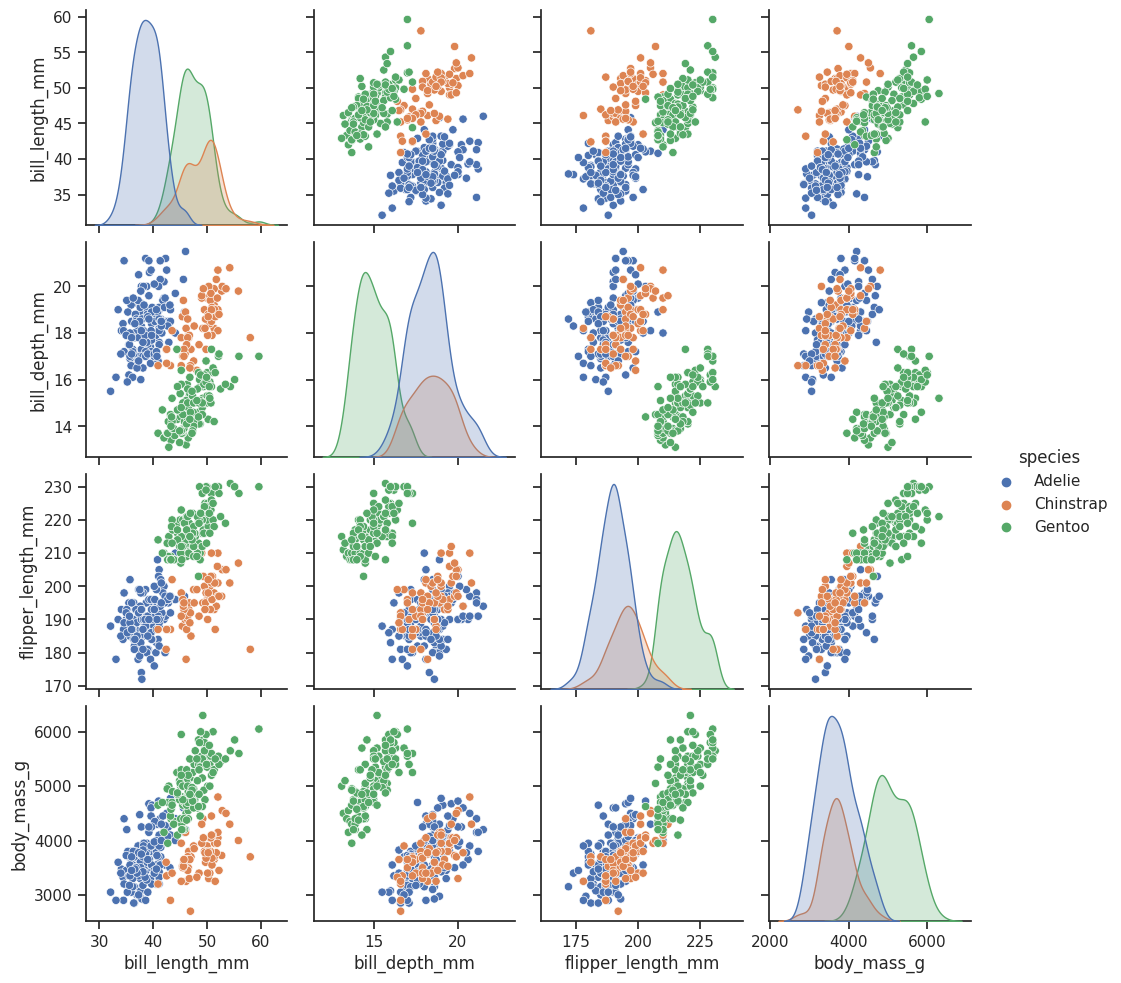

In [ ]:
sns.pairplot(df, hue="species")